In [1]:
import sys
sys.path.insert(1, '../../Pipeline')

import imp
import utils
imp.reload(utils)
from utils import *

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

try:
    from jupyterthemes import jtplot
    jtplot.style()
except:
    pass

ip = pd.read_csv('../../../data/cleandata/Info pluviometricas/Merged Data/merged.csv',
                 sep = ';',
                 dtype = {'Local_0': object, 'Local_1':object,
                          'Local_2':object,  'Local_3':object})

print(ip.columns)
ip.head()

Index(['index', 'Data', 'Hora', 'Data / Hora', 'UmidadeRelativa_0',
       'PressaoAtmosferica_0', 'Temperatura do Ar_0', 'TemperaturaInterna_0',
       'PontoDeOrvalho_0', 'SensacaoTermica_0', 'RadiacaoSolar_0',
       'DirecaoDoVento_0', 'VelocidadeDoVento_0', 'Precipitacao_0', 'Local_0',
       'UmidadeRelativa_1', 'PressaoAtmosferica_1', 'Temperatura do Ar_1',
       'TemperaturaInterna_1', 'PontoDeOrvalho_1', 'SensacaoTermica_1',
       'RadiacaoSolar_1', 'DirecaoDoVento_1', 'VelocidadeDoVento_1',
       'Precipitacao_1', 'Local_1', 'UmidadeRelativa_2',
       'PressaoAtmosferica_2', 'Temperatura do Ar_2', 'TemperaturaInterna_2',
       'PontoDeOrvalho_2', 'SensacaoTermica_2', 'RadiacaoSolar_2',
       'DirecaoDoVento_2', 'VelocidadeDoVento_2', 'Precipitacao_2', 'Local_2',
       'UmidadeRelativa_3', 'PressaoAtmosferica_3', 'Temperatura do Ar_3',
       'TemperaturaInterna_3', 'PontoDeOrvalho_3', 'SensacaoTermica_3',
       'RadiacaoSolar_3', 'DirecaoDoVento_3', 'VelocidadeDoVento

,index,Data,Hora,Data / Hora,UmidadeRelativa_0,PressaoAtmosferica_0,Temperatura do Ar_0,TemperaturaInterna_0,PontoDeOrvalho_0,SensacaoTermica_0,...,PressaoAtmosferica_4,Temperatura do Ar_4,TemperaturaInterna_4,PontoDeOrvalho_4,SensacaoTermica_4,RadiacaoSolar_4,DirecaoDoVento_4,VelocidadeDoVento_4,Precipitacao_4,Local_4
0,172386,01/01/11,00:00:59,2011-01-01 00:00:59,84.8,920.6,20.2,22.8,17.5,NaN,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Vitoria
1,172385,01/01/11,00:16:59,2011-01-01 00:16:59,84.1,920.3,20.1,22.8,17.4,NaN,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Vitoria
2,172384,01/01/11,00:30:58,2011-01-01 00:30:58,83.9,920.2,20.1,22.9,17.2,NaN,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Vitoria
3,172383,01/01/11,00:46:56,2011-01-01 00:46:56,83.5,919.9,20.2,22.9,17.3,NaN,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Vitoria
4,172382,01/01/11,01:00:51,2011-01-01 01:00:51,84.0,919.9,20.1,22.8,17.3,NaN,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Vitoria


In [3]:
"""
UmidadeRelativa
PressaoAtmosferica
Temperatura do Ar
TemperaturaInterna
PontoDeOrvalho
SensacaoTermica
RadiacaoSolar
DirecaoDoVento
Precipitacao
""";

In [4]:
"""VelocidadeDoVento"""

'VelocidadeDoVento'

#### Umidade Relativa 

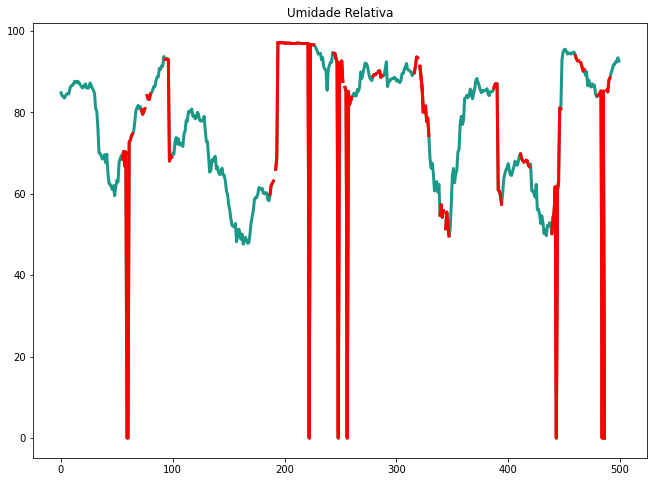

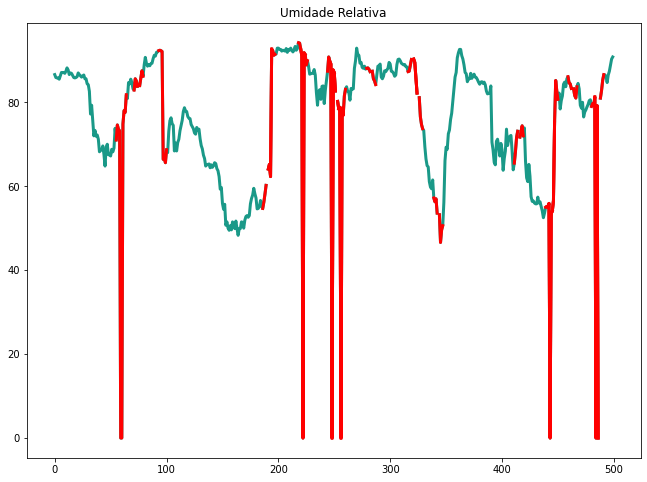

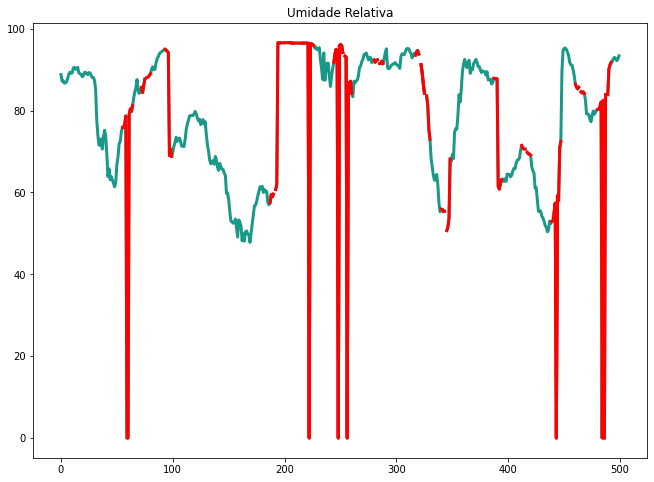

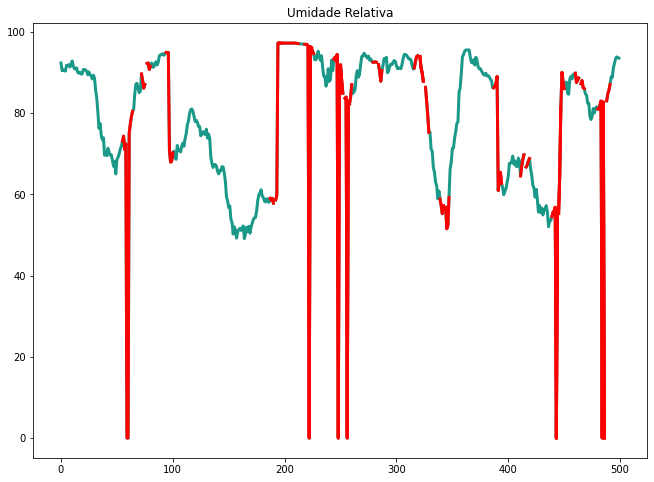

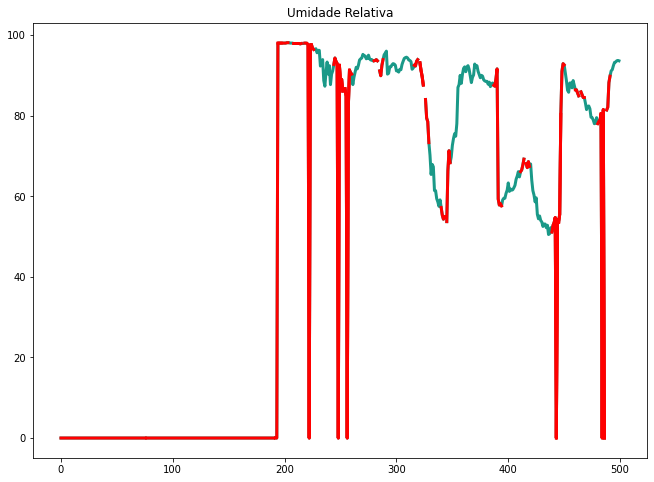

In [5]:
cols_um = [i for i in ip.columns if 'UmidadeRelativa' in i]
um = ip[cols_um].fillna(np.nan)
start, stop = 0, 500
for col in um.columns:
    peaks = derivative_threshold(um[col], 12, False, start, stop, lw = 2, figsize = (11, 15))
    zeros = derivative_zero(um[col], 3, False, False, start, stop, lw = 2, figsize = (11, 15))
    nans = um[col].isna()
    error = [zeros[i] or peaks[i] or nans[i] for i in range(len(peaks))]
    error_reg = list_2_regions(error)
    error_reg = increase_margins(3, error_reg, len(peaks))
    error = regions_2_list(error_reg, len(peaks))
    plot_regions(um[col], error_reg, start, stop, plt_type = 'lines', 
                 title = 'Umidade Relativa', figsize = (11, 8), lw = 3)

#### PressaoAtmosferica

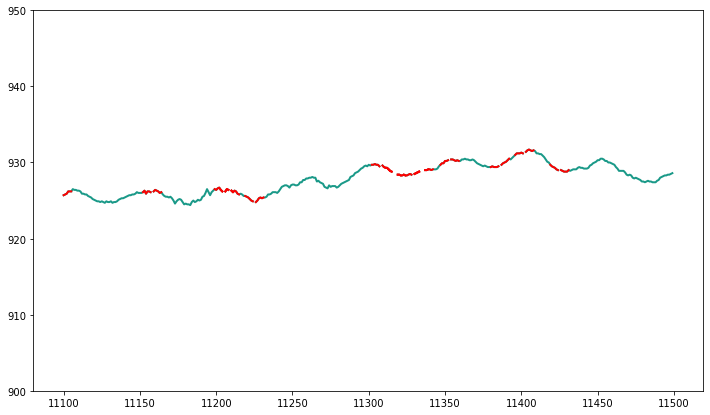

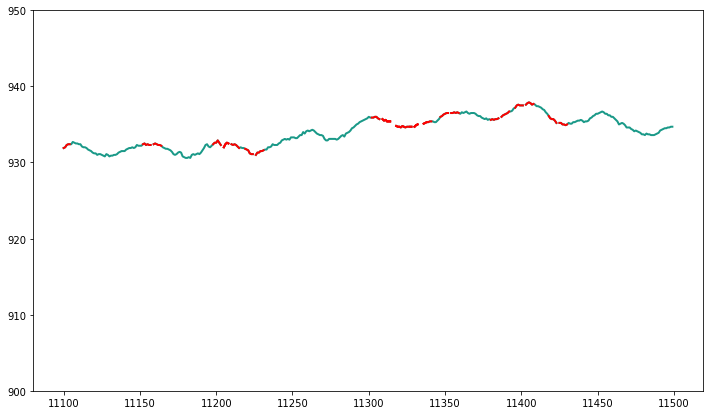

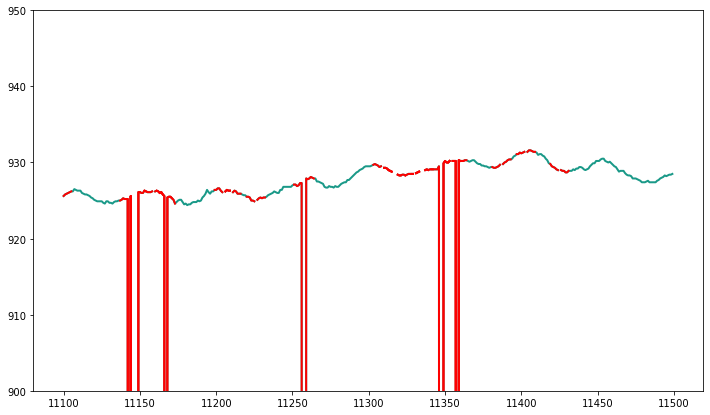

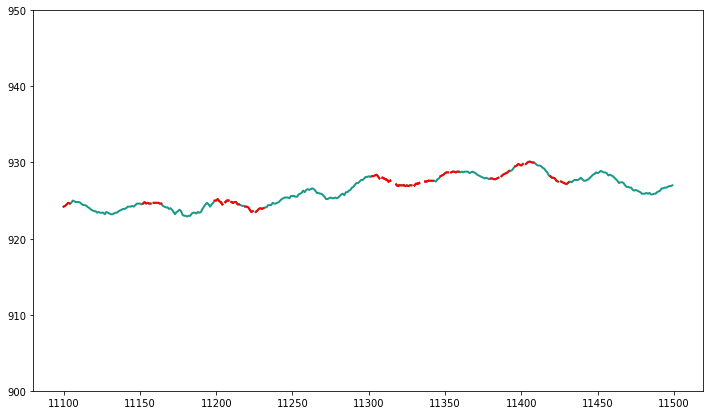

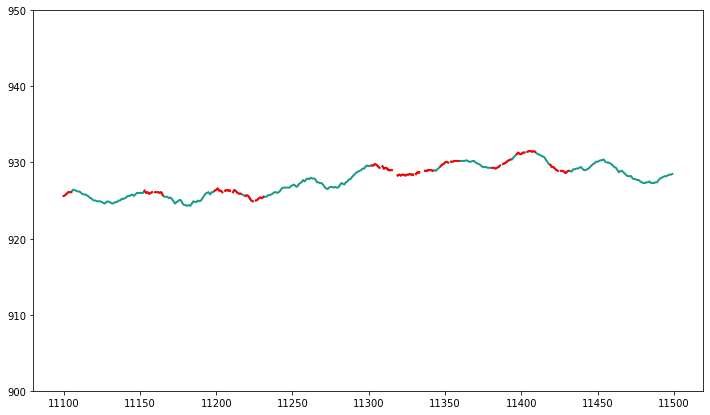

In [6]:
cols_um = [i for i in ip.columns if 'PressaoAtmosferica' in i]
um = ip[cols_um].fillna(np.nan)
um.head()

for col in um.columns:
    peaks = derivative_threshold(um[col], 50, False, 1000, 1500, ylim = [900, 1000])
    zeros = derivative_zero(um[col], 7, False, False, 1000, 1500, ylim = [900, 1000])
    nans = um[col].isna()
    error = [zeros[i] or peaks[i] or nans[i] for i in range(len(peaks))]
    error_reg = list_2_regions(error)
    error_reg = increase_margins(5, error_reg, len(peaks))
    plot_regions(um[col], error_reg, 11100, 11500, plt_type = 'lines', ylim=[900, 950])

#### Temperatura do Ar

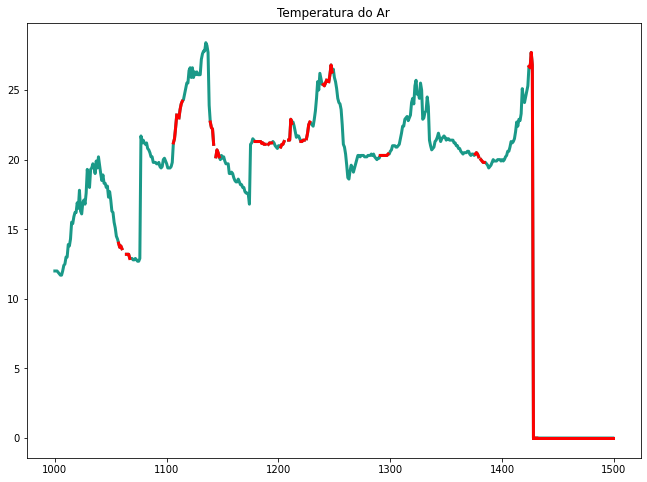

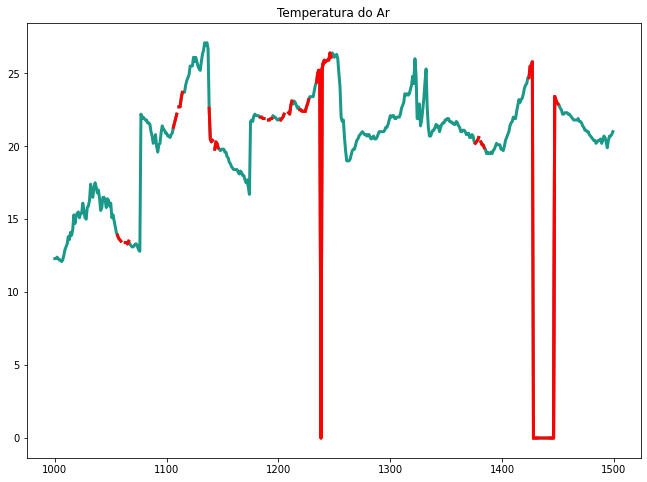

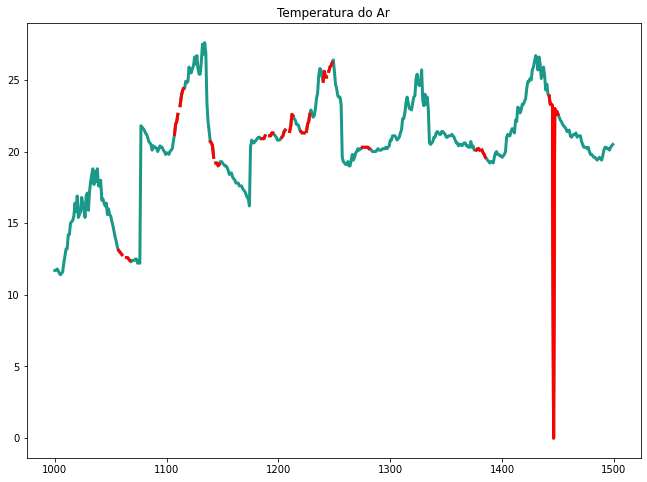

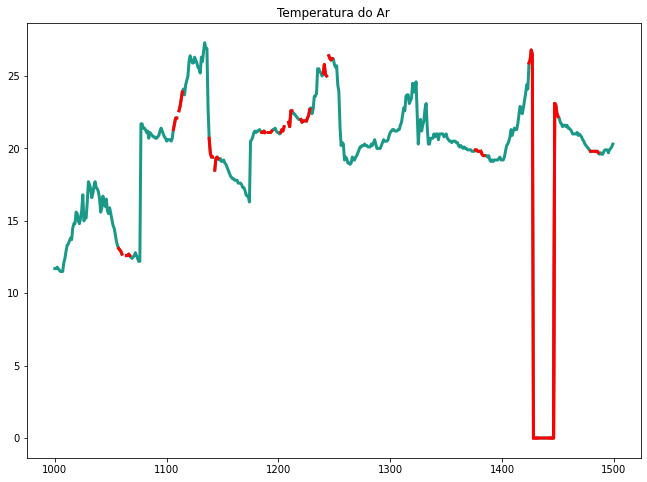

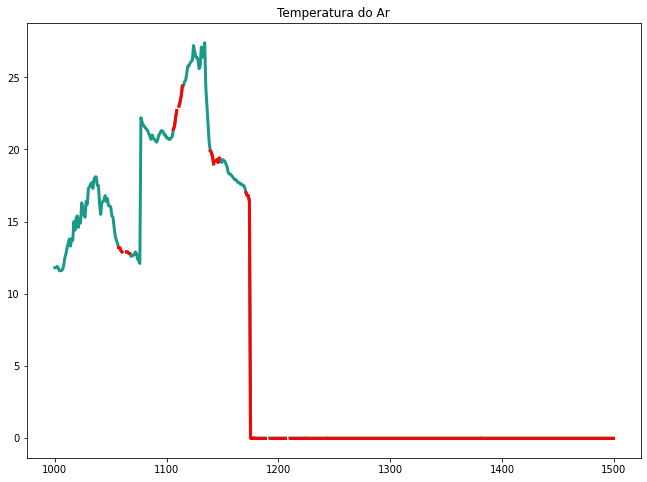

In [7]:
cols_um = [i for i in ip.columns if 'Temperatura do Ar' in i]
um = ip[cols_um].fillna(np.nan)
um.head()

for col in um.columns:
    peaks = derivative_threshold(um[col], 6, False, 4000, 4500)
    zeros = derivative_zero(um[col], 4,False, False, 1000, 1500)
    nans = um[col].isna()
    error = [zeros[i] or peaks[i] or nans[i] for i in range(len(peaks))]
    error_reg = list_2_regions(error)
    error_reg = increase_margins(3, error_reg, len(peaks))
    plot_regions(um[col], error_reg, 1000, 1500, plt_type = 'lines',
                 title = 'Temperatura do Ar', figsize = (11, 8), lw = 3)

#### TemperaturaInterna

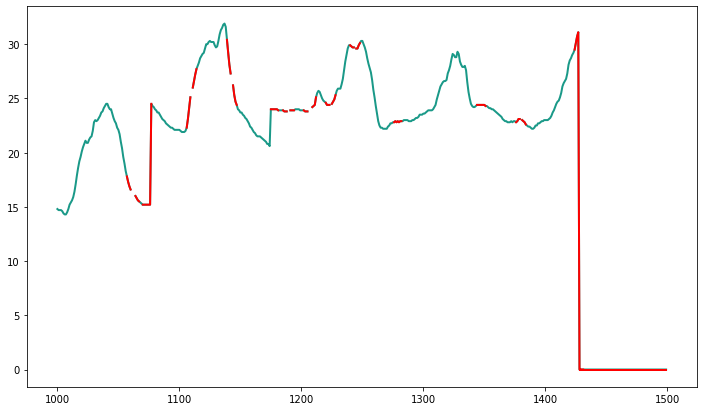

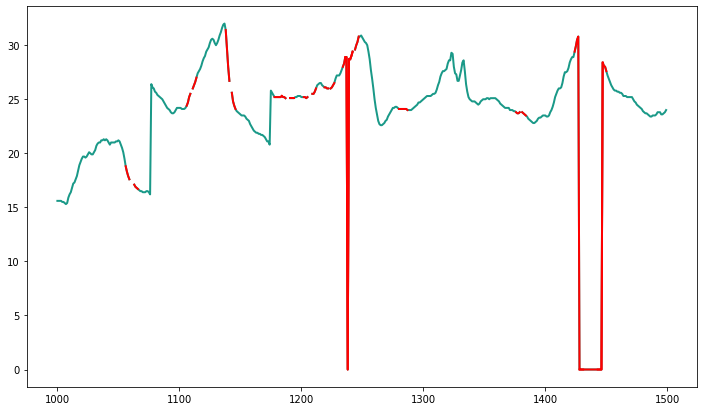

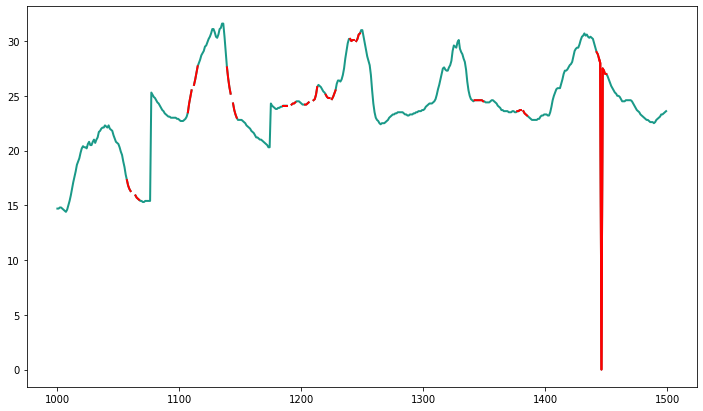

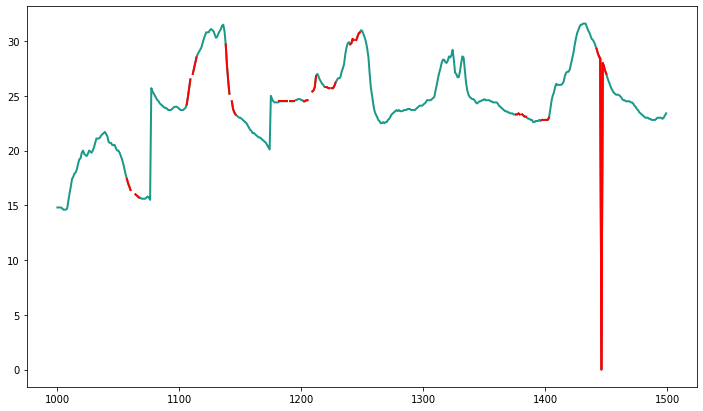

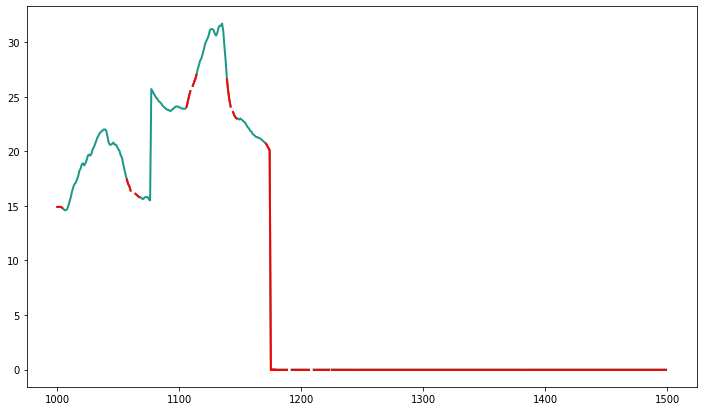

In [8]:
cols_um = [i for i in ip.columns if 'TemperaturaInterna' in i]
um = ip[cols_um].fillna(np.nan)
um.head()

for col in um.columns:
    peaks = derivative_threshold(um[col], 6, False, 4000, 4500)
    zeros = derivative_zero(um[col], 4, False, False, 1000, 1500)
    nans = um[col].isna()
    error = [zeros[i] or peaks[i] or nans[i] for i in range(len(peaks))]
    error_reg = list_2_regions(error)
    error_reg = increase_margins(3, error_reg, len(peaks))
    plot_regions(um[col], error_reg, 1000, 1500, plt_type = 'lines')

#### PontoDeOrvalho

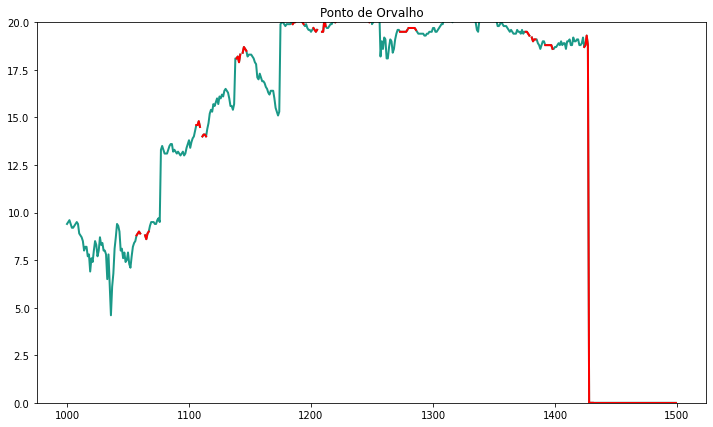

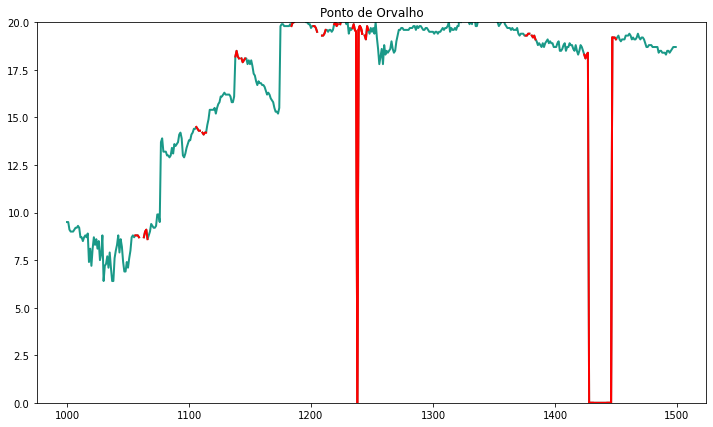

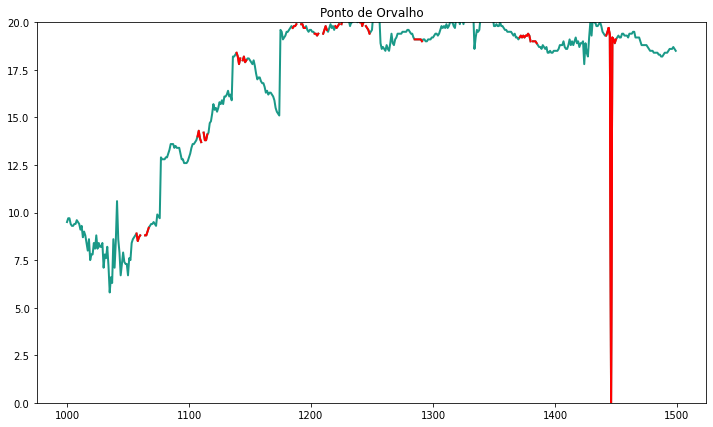

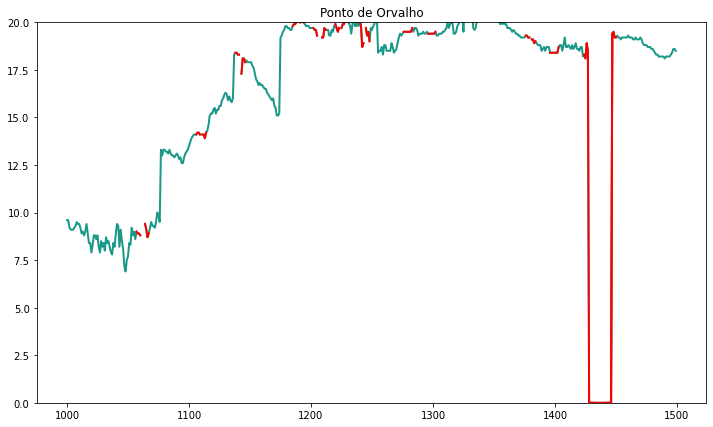

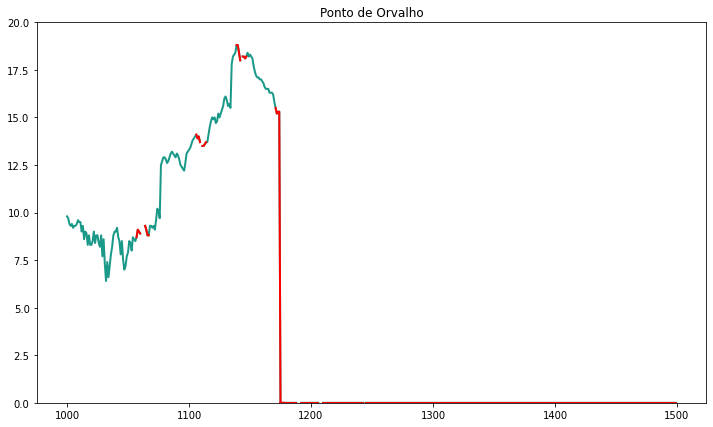

In [9]:
cols_um = [i for i in ip.columns if 'PontoDeOrvalho' in i]
um = ip[cols_um].fillna(np.nan)
um.head()

for col in um.columns:
    peaks = derivative_threshold(um[col], 3.5, False, 4000, 4500)
    zeros = derivative_zero(um[col], 4, False, False, 1000, 1500)
    nans = um[col].isna()
    error = [zeros[i] or peaks[i] or nans[i] for i in range(len(peaks))]
    error_reg = list_2_regions(error)
    error_reg = increase_margins(3, error_reg, len(peaks))
    plot_regions(um[col], error_reg, 1000, 1500, plt_type = 'lines', ylim=[0, 20], title = 'Ponto de Orvalho')

#### SensacaoTermica

In [10]:
um

,PontoDeOrvalho_0,PontoDeOrvalho_1,PontoDeOrvalho_2,PontoDeOrvalho_3,PontoDeOrvalho_4
0,17.5,17.8,17.7,18.0,0.0
1,17.4,17.7,17.4,17.7,0.0
2,17.2,17.7,17.5,17.6,0.0
3,17.3,17.6,17.3,17.7,0.0
4,17.3,17.6,17.3,17.6,0.0
...,...,...,...,...,...
393173,14.9,15.4,NaN,15.9,10.4
393174,15.0,15.5,NaN,16.4,12.2
393175,15.6,16.1,NaN,19.6,0.0
393176,15.7,16.3,NaN,0.0,0.0


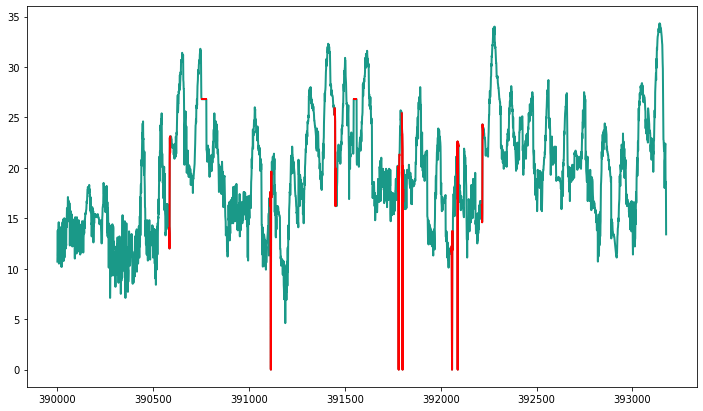

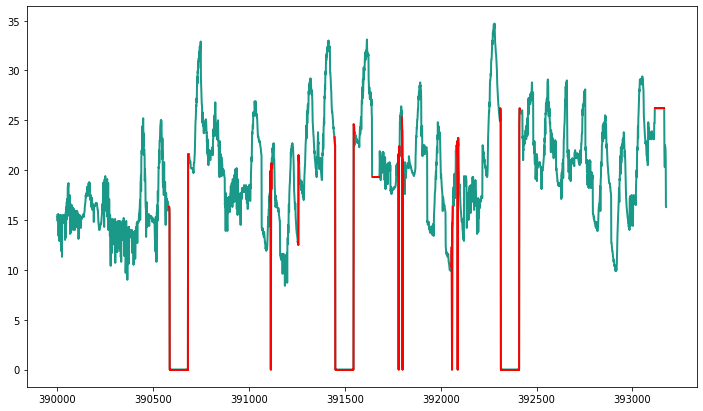

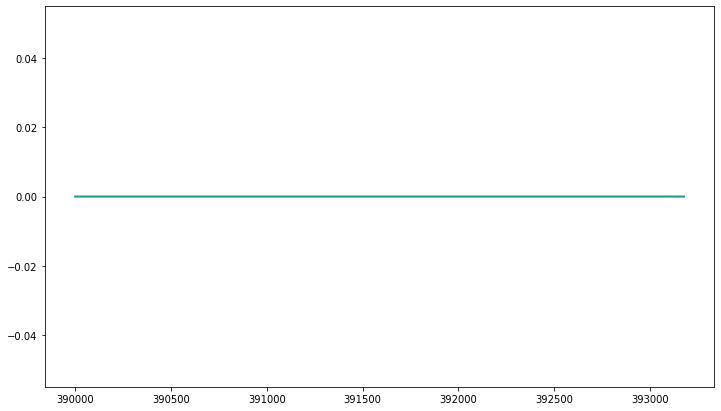

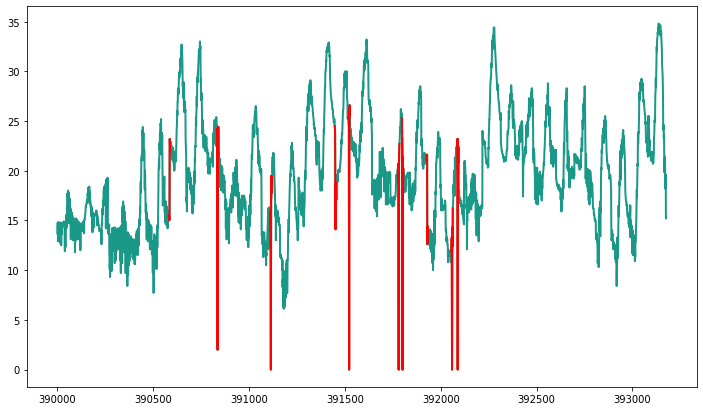

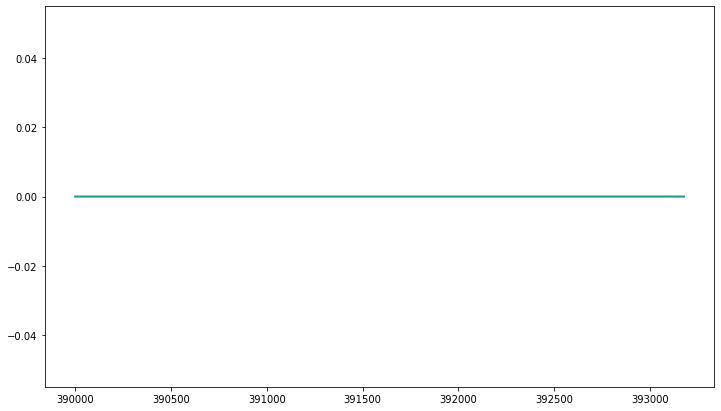

In [11]:
cols_um = [i for i in ip.columns if 'SensacaoTermica' in i]
um = ip[cols_um].fillna(np.nan)
um.head()
start, stop = 390000, 393177
for col in um.columns:
    peaks = derivative_threshold(um[col].fillna(0), 4, False, start, stop)
    zeros = derivative_zero(um[col].fillna(0), 10, False, False, start, stop)
    nans = um[col].isna()
    error = [zeros[i] or peaks[i] or nans[i] for i in range(len(peaks))]
    error_reg = list_2_regions(error)
    error_reg = increase_margins(3, error_reg, len(peaks))
    plot_regions(um[col].fillna(0), error_reg, start, stop, plt_type = 'lines')

#### RadiacaoSolar

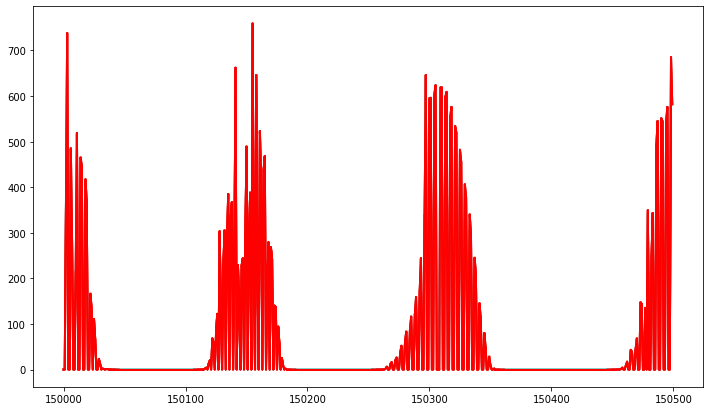

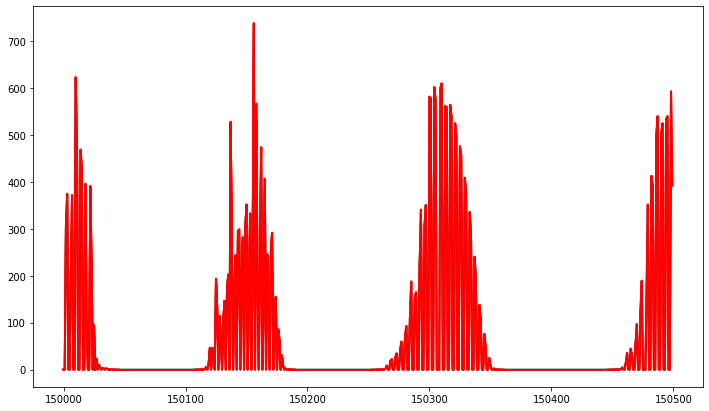

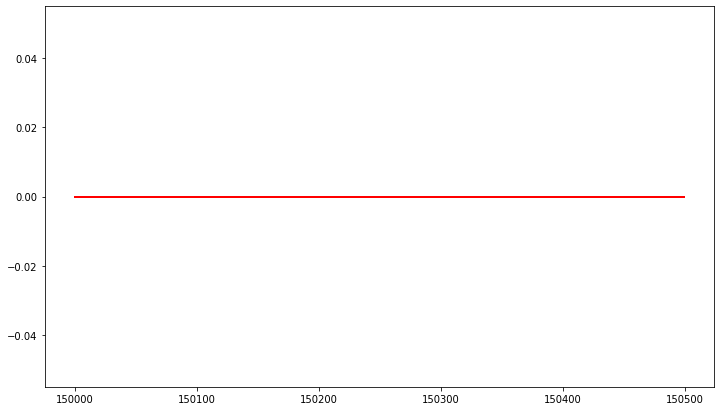

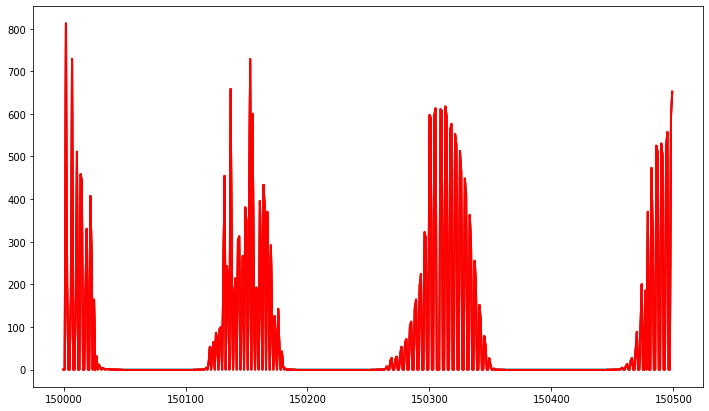

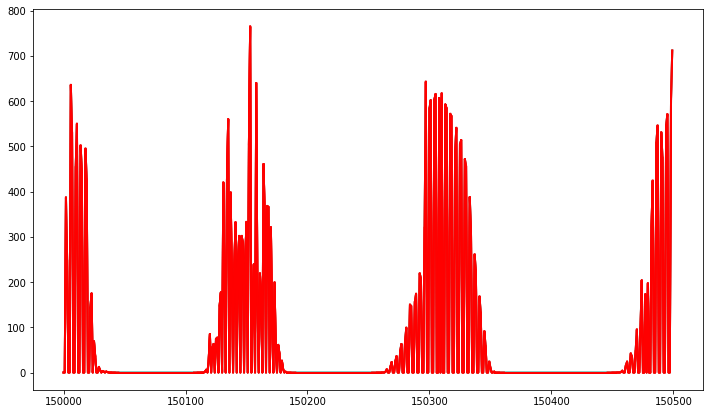

In [16]:
cols_um = [i for i in ip.columns if 'RadiacaoSolar' in i]
um = ip[cols_um].fillna(np.nan)
um.head()
start, stop = 150000, 150500
for col in um.columns:
    peaks = derivative_threshold(um[col].fillna(0), 750, False, start, stop)
    zeros = derivative_zero(um[col].fillna(0), 100, False, plot = False, plt_start = start, plt_stop = stop)
    const_not_null = derivative_zero(um[col].fillna(0), 3, True, False, start, stop)
    nans = um[col].isna()
    error = [zeros[i] or nans[i] or const_not_null[i] or peaks[i] for i in range(len(zeros))]
    error = nans
    error_reg = list_2_regions(error)
    error_reg = increase_margins(5, error_reg, len(zeros))
    plot_regions(um[col].fillna(0), error_reg, start, stop, plt_type = 'lines')

#### DirecaoDoVento

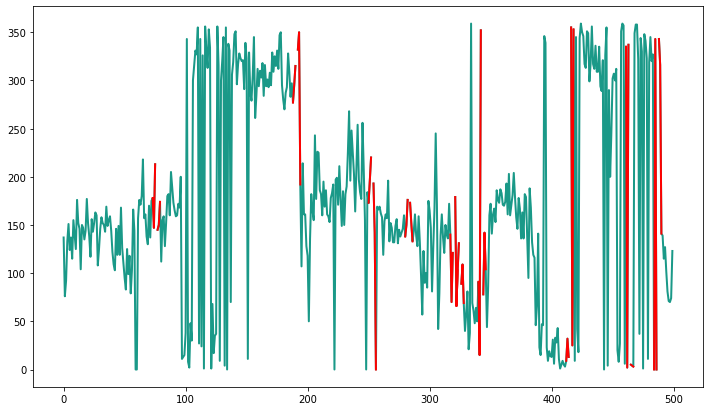

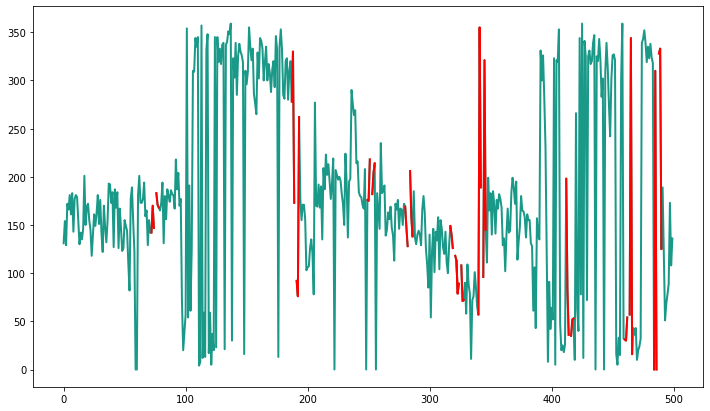

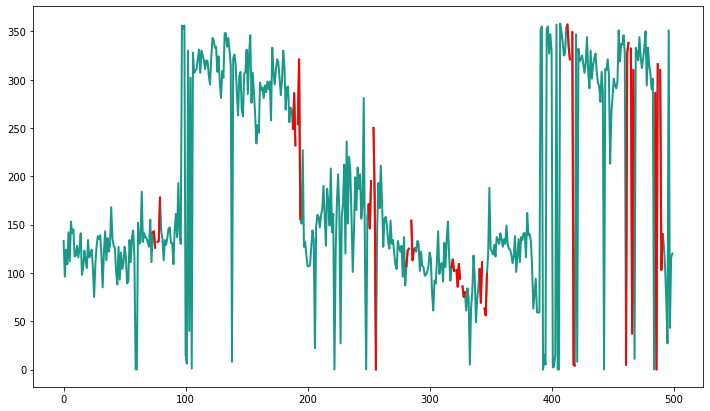

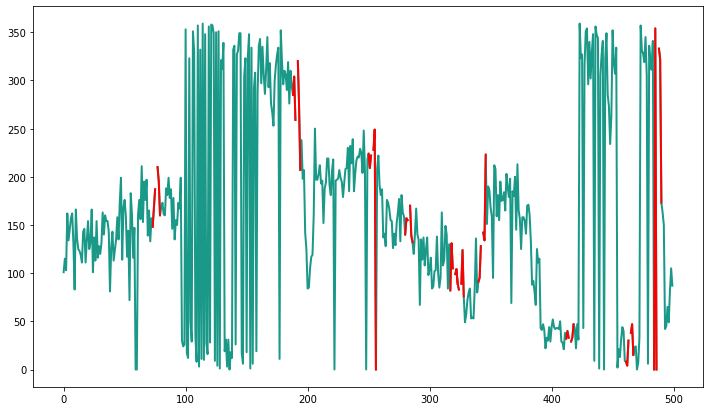

In [13]:
cols_um = [i for i in ip.columns if 'DirecaoDoVento' in i]
um = ip[cols_um]
um.head()
start, stop = 0, 0 + 500
for col in um.columns[:-1]:
    #peaks = derivative_threshold(um[col].fillna(0), 120, True, start, stop)
    zeros = derivative_zero(um[col].fillna(0), 3, False, start, stop)
    nans = um[col].isna()
    error = [zeros[i] or nans[i] for i in range(len(zeros))]
    error_reg = list_2_regions(error)
    error_reg = increase_margins(3, error_reg, len(zeros))
    plot_regions(um[col], error_reg, start, stop, plt_type = 'lines')

#### Velocidade do Vento

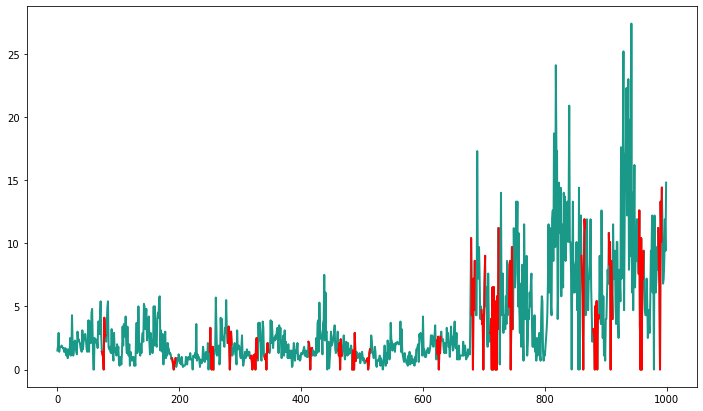

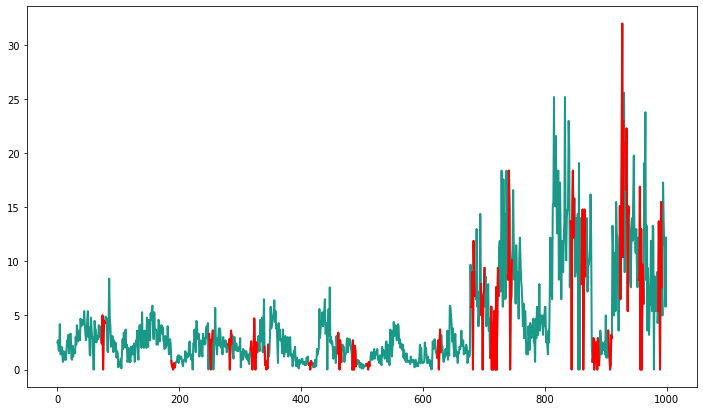

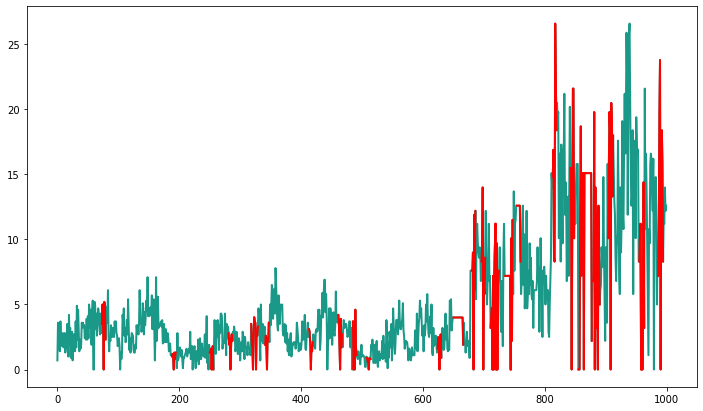

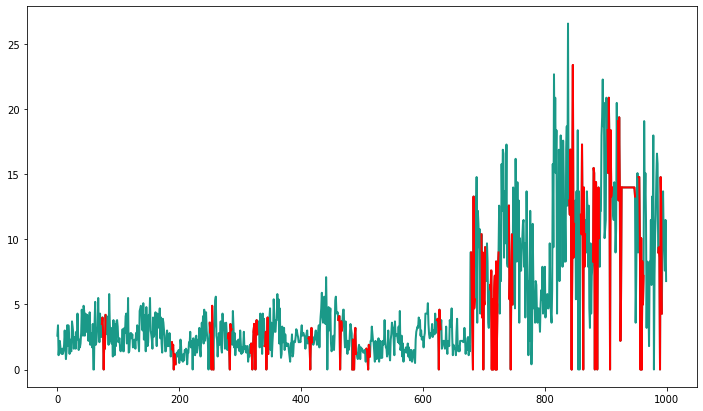

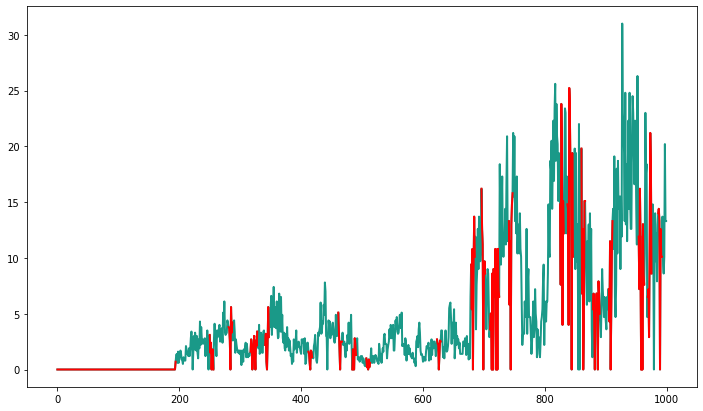

In [14]:
cols_um = [i for i in ip.columns if 'VelocidadeDoVento' in i]
um = ip[cols_um].fillna(np.nan)
um.head()
start, stop = 0, 1000
for col in um.columns:
    peaks = derivative_threshold(um[col], 8, False, start, stop)
    zeros = derivative_zero(um[col].fillna(0), 5, False, start, stop)
    nans = um[col].isna()
    error = [zeros[i] or peaks[i] or nans[i] for i in range(len(peaks))]
    error_reg = list_2_regions(error)
    error_reg = increase_margins(3, error_reg, len(peaks))
    plot_regions(um[col].fillna(0), error_reg, start, stop, plt_type = 'lines')

#### Precipitacao

In [15]:
cols_um = [i for i in ip.columns if 'Precipitacao' in i]
um = ip[cols_um].fillna(np.nan)
um.head()
start, stop = 15000, 20000
max_ = 0
for col in um.columns[:-1]:
    print(um[col].nlargest(5))

    #zeros = derivative_zero(um[col].fillna(0), 10, False, start, stop)
    #nans = um[col].isna()
    #error = [zeros[i] or peaks[i] or nans[i] for i in range(len(peaks))]
    #error_reg = list_2_regions(error)
    #error_reg = increase_margins(3, error_reg, len(peaks))
    #plot_regions(um[col].fillna(0), error_reg, len(um[col]), start, stop, plt_type = 'lines')

1738      57.0
1737      55.6
272454    52.6
260754    51.2
8108      50.8
Name: Precipitacao_0, dtype: float64
381789    80.0
381790    80.0
381791    80.0
381792    80.0
34952     56.5
Name: Precipitacao_1, dtype: float64
1738      65.2
265478    64.4
265479    63.3
1737      63.1
1261      55.2
Name: Precipitacao_2, dtype: float64
3185      66.6
3184      65.0
3183      55.9
34080     51.6
390863    50.8
Name: Precipitacao_3, dtype: float64
